In [1]:
import nltk
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import time

from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/jovyan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [3]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [4]:
get_tags = ['JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNPS', 'NNS']

In [5]:
# adding whisky script specific stopwords
stopwords = set(STOPWORDS)
stopwords |= set(['whisky',
                  'whiskey',
                  'whiskies',
                  'Japan',
                  'Japanese',
                  'Hibiki',
                  'Hakushu',
                  'Yamazaki',
                  'Nikka',
                  'price',
                  'bottle',
                  'bottles',
                  'year',
                  'time',
                  'taste',
                  'aroma',
                  'flavor',
                  'flavors',
                  'flavour',
                  'flavours',
                  'note',
                  'notes',
                  'nose',
                  'best',
                  'better',
                  'good',
                  'great',
                  'nice',
                  'really',
                  'little',
                  'bit',
                  'much',
                  'way'])

# スコッチレビューのワードクラウド

In [6]:
# スコッチレビュー取得
df = pd.read_csv('scotch_review2020.csv')
scotch_text = df['description.1.2247.'].dropna().str.cat(sep=' ')

# テキストから名詞，形容詞だけを抽出
tags = nltk.pos_tag(nltk.word_tokenize(scotch_text))
scotch_text = ' '.join([x[0] for x in tags if x[1] in get_tags])

In [7]:
wc = WordCloud(max_words=100, stopwords=stopwords, margin=10,
               random_state=1).generate(scotch_text)

In [8]:
# store default colored image
default_scotch = wc.to_array()

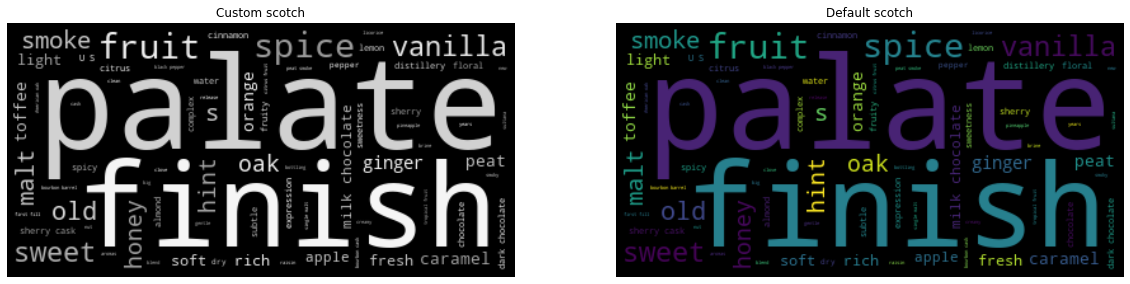

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title("Custom scotch")
axes[0].imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
axes[0].axis("off")

axes[1].set_title("Default scotch")
axes[1].imshow(default_scotch, interpolation="bilinear")
axes[1].axis("off")

plt.savefig('scotch_wordclowd.png')
plt.show()

# ジャパニーズレビューのワードクラウド

In [10]:
df = pd.read_csv('japanese_whisky_review.csv')
japanese_text = df['Review_Content'].dropna().str.cat(sep=' ')

# テキストから名詞，形容詞だけを抽出
tags = nltk.pos_tag(nltk.word_tokenize(japanese_text))
japanese_text = ' '.join([x[0] for x in tags if x[1] in get_tags])

In [11]:
wc = WordCloud(max_words=100, stopwords=stopwords, margin=10,
               random_state=1).generate(japanese_text)

In [12]:
default_japanese = wc.to_array()

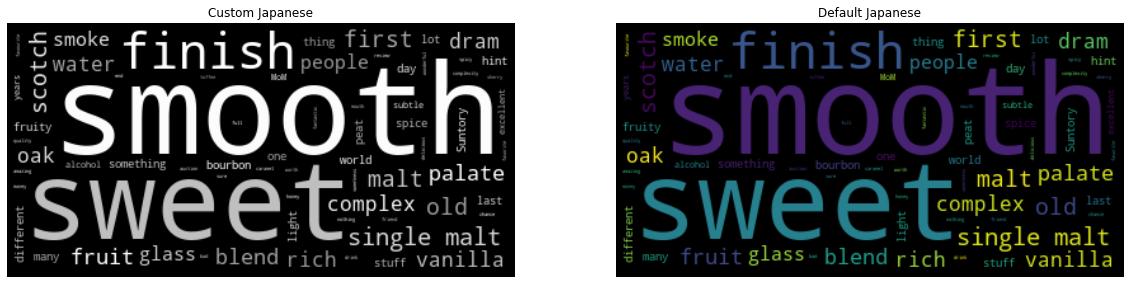

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title("Custom Japanese")
axes[0].imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
axes[0].axis("off")

axes[1].set_title("Default Japanese")
axes[1].imshow(default_japanese, interpolation="bilinear")
axes[1].axis("off")

plt.savefig('japanese_wordclowd.png')
plt.show()

# 日本の銘柄別

In [14]:
# 銘柄ごとにレビューをまとめる
japanese_text_dict= {}

for b in df['Brand'].unique():
    japanese_text_dict[b] = (df[df['Brand'] == b]['Review_Content'].dropna().str.cat(sep=' '))

In [15]:
len(japanese_text_dict['Yamazaki'])

113312

In [16]:
# 名詞，形容詞を抽出
for k, v in japanese_text_dict.items():
    tags = nltk.pos_tag(nltk.word_tokenize(v))
    japanese_text_dict[k] = ' '.join([x[0] for x in tags if x[1] in get_tags])

In [17]:
len(japanese_text_dict['Yamazaki'])

48266

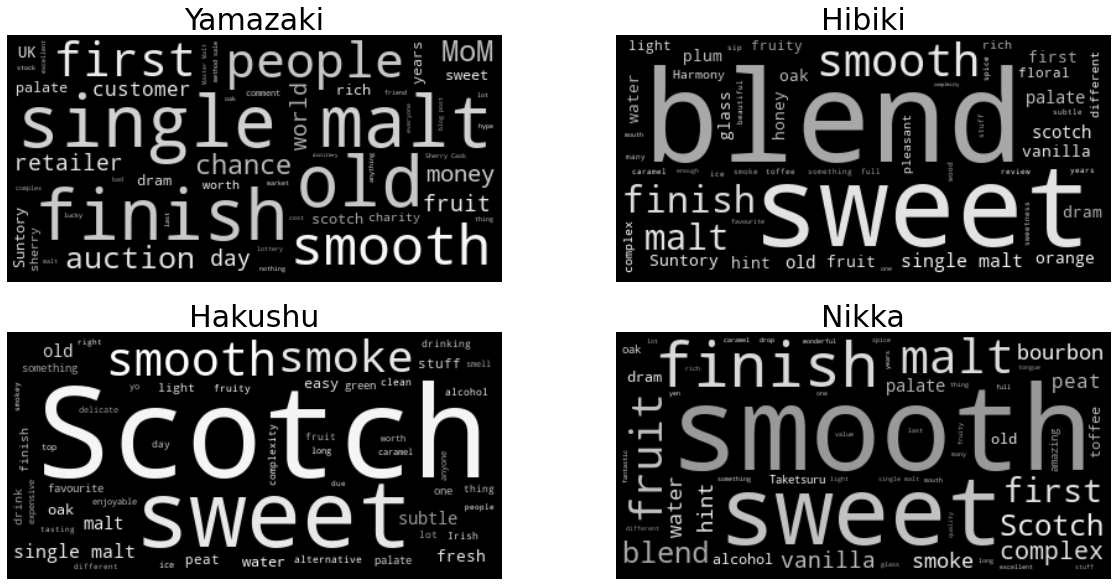

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

i = 0

for k, v in japanese_text_dict.items():
    wc = WordCloud(max_words=50, stopwords=stopwords, margin=10,
               random_state=1).generate(v)
    r = i // 2
    c = i % 2
    ax = axes[r, c]
    ax.set_title(k, fontdict={'fontsize': 30})
    ax.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    ax.axis("off")
    i += 1
    
plt.savefig('japanese_brands_wordclowd.png')
plt.show()